# Project: European Soccer Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset that I have chosen to investigate is the European Soccer Database, which has data for 25k+ matches, players & teams attributes for 11 European Professional Football Leagues. The time period spanned in the dataset is from 2008 until 2016. It contains data from the premier soccer league in 11 European countries.

> There a few questions I will atempt to answer. Firstly, which league is the highest scoring per game on average. Essentially if I solely want to see a lot of goals scored which league should I watch?

> Secondly, I would like to investigate the player attribute table and discover what statistics are good indicators of a top player. I would also like to find some variables that have a negative effect on a players rating.

> Finally I would like to have a look at the impact of the home team's advantage on match results. With over 25k matches I will be able to get a clear picture of whether there is any benefit to playing in front of your home crowd, and if so how much of an advantage is it truly.

In [1]:
## importing all revelant packages and dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df_m = pd.read_csv('Match.csv')
df_t = pd.read_csv('Team.csv')
df_c = pd.read_csv('Country.csv')
df_l = pd.read_csv('League.csv')
df_ta = pd.read_csv('Team_Attributes.csv')
df_p = pd.read_csv('Player.csv')
df_pa = pd.read_csv('Player_Attributes.csv')

## begin investigating match table
df_m.head()

FileNotFoundError: [Errno 2] File Match.csv does not exist: 'Match.csv'

In [3]:
## checking for null values in the match table
df_m.isna().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [4]:
## researched match dataset info and discovered that the first 11 columns are the most important for my investigation
## select only first 11 columns as they are the only ones neccessary
df_m = df_m.iloc[:, : 11]
df_m.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [5]:
## check for null values in updated dataset
df_m.isna().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

In [6]:
## check for duplicate values in updated dataset
sum(df_m.duplicated())

0

In [7]:
## check team table for data validation
df_t.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [8]:
## check country table for data validation
df_c

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [9]:
## check league table for data validation
df_l

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [10]:
## check player table for data validation
df_p.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [11]:
df_p.shape

(11060, 7)

In [12]:
## further checking of player table
df_p.isna().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [13]:
## check player table
sum(df_p.duplicated())

0

In [14]:
## check player attributes table
df_pa.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [15]:
## investigate size of player attribute database
df_pa.shape

(183978, 42)

In [16]:
## investigate player attribute table
df_pa.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [17]:
## check for null values in player attributes table
df_pa.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [18]:
## remove rows with null values since they are a negligible % of total table
df_pa = df_pa.dropna(how='any',axis=0)
df_pa.isna().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [19]:
## check that only ~ 3000 of 183,000 have been omitted
df_pa.shape

(180354, 42)

In [20]:
## finally check player attributes for duplicates
sum(df_pa.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What Soccer League in Europe averages the most goals per match?

> Use Match dataframe to investigate. I have to create new columns to be able to answer this question, as well as merging other dataframes to summarize it fully.

In [21]:
## add a score column to the match df that indicates the final score from the home team's perspective
score = df_m['home_team_goal'] - df_m['away_team_goal']
df_m['Score'] = score
df_m.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Score
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,0
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,-3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,5
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,-2


In [22]:
## translate score integer into a more readable 'match result' from the home teams perspective
result = [] 
for value in df_m['Score']: 
    if value > 0: 
        result.append("Win") 
    elif value == 0: 
        result.append("Draw") 
    else:
        result.append("Loss") 
        
df_m["Outcome"] = result    
df_m.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Score,Outcome
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,0,Draw
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0,Draw
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,-3,Loss
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,5,Win
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,-2,Loss


In [23]:
## creating new column for the number of goals scored in each match 
goals = df_m['home_team_goal'] + df_m['away_team_goal']
df_m['Goals'] = goals
df_m.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Score,Outcome,Goals
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,0,Draw,2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0,Draw,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,-3,Loss,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,5,Win,5
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,-2,Loss,4


In [24]:
## verifying that league id is acting as a duplicate identifier for country id
## ie there is only 1 league in each country in the dataset
df_m.groupby('country_id')['Goals'].mean() == df_m.groupby('league_id')['Goals'].mean()

country_id
1        True
1729     True
4769     True
7809     True
10257    True
13274    True
15722    True
17642    True
19694    True
21518    True
24558    True
Name: Goals, dtype: bool

In [25]:
## merge country table with league table
df_league = df_l.merge(df_c, left_on = 'id', right_on = 'id', how = 'inner')
df_league

,id,country_id,name_x,name_y
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


In [26]:
## rename columns for clarity
df_league.rename(columns={'name_x': 'League', 'name_y': 'Country'}, inplace=True)
df_league

,id,country_id,League,Country
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


In [27]:
## merge country & league info with match table 
df_m = df_league.merge(df_m, left_on='country_id', right_on='country_id', how='inner')
df_m.head()

,id_x,country_id,League,Country,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Score,Outcome,Goals
0,1,1,Belgium Jupiler League,Belgium,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,0,Draw,2
1,1,1,Belgium Jupiler League,Belgium,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0,Draw,0
2,1,1,Belgium Jupiler League,Belgium,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,-3,Loss,3
3,1,1,Belgium Jupiler League,Belgium,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,5,Win,5
4,1,1,Belgium Jupiler League,Belgium,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,-2,Loss,4


In [28]:
## explore trends in goals scored during seasons
## showing clearly that on any given year the average # goals scored per match in Europe does not change a lot
df_m.groupby('season')['Goals'].mean()

season
2008/2009    2.607336
2009/2010    2.672446
2010/2011    2.683742
2011/2012    2.716460
2012/2013    2.772699
2013/2014    2.766821
2014/2015    2.675789
2015/2016    2.754660
Name: Goals, dtype: float64

Text(0.5, 1.0, 'Average Goals Per Game in European Soccer')

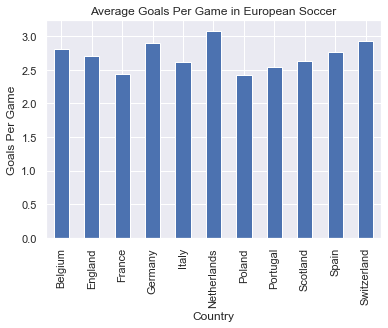

In [29]:
## summary of average goals scored per match in top European soccer leagues
df_m.groupby('Country')['Goals'].mean().plot(kind='bar', figsize = (6,4))                                              
plt.xlabel('Country')
plt.ylabel('Goals Per Game')
plt.title('Average Goals Per Game in European Soccer')

In [30]:
df_m.groupby('Country')['Goals'].mean()

Country
Belgium        2.801505
England        2.710526
France         2.443092
Germany        2.901552
Italy          2.616838
Netherlands    3.080882
Poland         2.425000
Portugal       2.534600
Scotland       2.633772
Spain          2.767105
Switzerland    2.929677
Name: Goals, dtype: float64

### Question 1 is hence answered. 

> The league in Europe in which the most goals scored per game during the time period given in the dataset is in the Netherlands 'Eredivisie' with 3.08 goals per match. 

> The lowest average goals per match in Europe comes from the Poland Ekstraklasa with 2.42 goals per match. France's Ligue 1 is closely following with 2.44 goals per match.

Text(0.5, 1.0, 'Goals Scored per League Through Time Period 2008-2016')

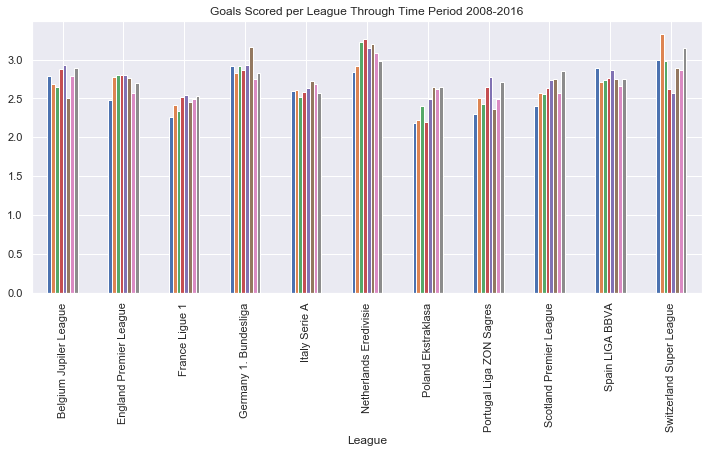

In [31]:
## graphic representation to show that throughout the years trends in goals scored per league
## shown that the average goals scored per league is fairly consistent
df_m.groupby(['League','season'])['Goals'].mean().unstack().plot(kind='bar',legend=False,figsize=(12,5))
plt.title('Goals Scored per League Through Time Period 2008-2016')

In [32]:
## save merged match file to Jupyter
df_m.to_csv('Match_Data.csv', index = False)

## Research Question 2: Which attributes are the good indicators/predictors of a players rating?

### Investigate common qualities that are found among the highest & lowest rated players.



In [33]:
## begin investigating player attribute dataframe
df_pa.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [34]:
## merge the two player tables to get player names combined with attributes
df_player = df_p.merge(df_pa, left_on = 'player_api_id', right_on = 'player_api_id', how ='inner')

In [35]:
## check merge was successful
df_player

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180349,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183974,102359,2009-08-30 00:00:00,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
180350,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183975,102359,2009-02-22 00:00:00,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
180351,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183976,102359,2008-08-30 00:00:00,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
180352,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183977,102359,2007-08-30 00:00:00,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


## Interesting Observation

> There is no change in any player's height or weight statistics during the course of their careers

> This would indicate to me that they are being measured at the start of their careers and then never measured again to be updated in the databases. 

> This is a potential issue if you were attempting to perform data analysis based on these factors.

In [36]:
## check shape for data integrity
df_player.shape

(180354, 48)

In [37]:
## check for null values in new combined dataframe
df_player.isna().sum()

id_x                    0
player_api_id           0
player_name             0
player_fifa_api_id_x    0
birthday                0
height                  0
weight                  0
id_y                    0
player_fifa_api_id_y    0
date                    0
overall_rating          0
potential               0
preferred_foot          0
attacking_work_rate     0
defensive_work_rate     0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
dribbling               0
curve                   0
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility                 0
reactions               0
balance                 0
shot_power              0
jumping                 0
stamina                 0
strength                0
long_shots              0
aggression              0
interceptions           0
positioning             0
vision      

In [38]:
## player attribute table has a unique row for each season of a player's career
## therefore group by player name to get an average of their career statistics
df_ratings = df_player.groupby('player_name').mean()
df_ratings.head()

,id_x,player_api_id,player_fifa_api_id_x,height,weight,id_y,player_fifa_api_id_y,overall_rating,potential,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_name,,,,,,,,,,,,,,,,,,,,,
Aaron Appindangoye,1.0,505942.0,218353.0,182.88,187.0,3.0,218353.0,63.600000,67.600000,48.600000,...,53.600000,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000
Aaron Cresswell,2.0,155782.0,189615.0,170.18,146.0,22.0,189615.0,66.969697,74.484848,70.787879,...,57.454545,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091
Aaron Doran,3.0,162549.0,186170.0,170.18,163.0,51.5,186170.0,67.000000,74.192308,68.115385,...,69.384615,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000
Aaron Galindo,4.0,30572.0,140161.0,182.88,198.0,76.0,140161.0,69.086957,70.782609,57.217391,...,53.782609,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913
Aaron Hughes,5.0,23780.0,17725.0,182.88,154.0,100.0,17725.0,73.240000,74.680000,45.080000,...,46.480000,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000


In [39]:
## 180,000 player rows was reduced to only 10,226 unique players
df_ratings.shape

(10226, 42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a4fd890>,
      dtype=object)

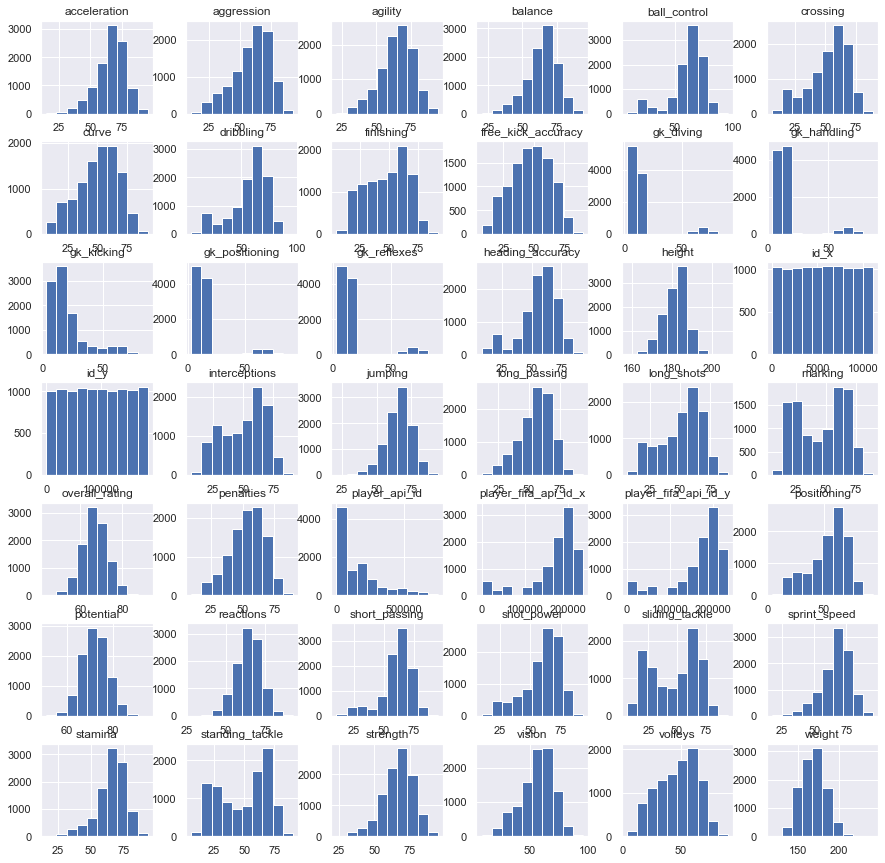

In [40]:
## investigate player attribute distribution
df_ratings.hist(figsize=(15,15))

## General Left Skewness

> Clear to see that for almost every 'outfield' statistic, i.e sprint speed & short passing, are consistently skewed to the left. This is due to the effect of goalkeepers in the dataset. Goalkeepers generally have poor 'common' stats yet excel in their 5 goalkeeping categories. 

> Perhaps it would be smart to separate the goalkeepers from the rest of the players for more accurate representation of each group.

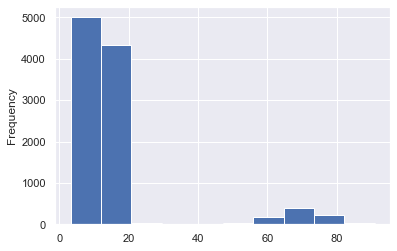

In [41]:
## check distribution of multiple goalkeeper statistics
## to find statistical bounds for who would be considered a goalkeeper
df_ratings['gk_reflexes'].plot(kind='hist')

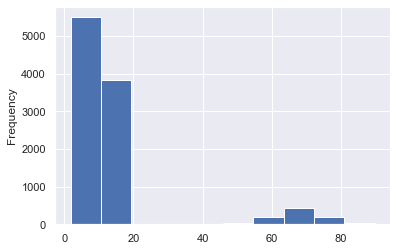

In [42]:
## check distribution of multiple goalkeeper statistics to find out bounds for what would be considered a goalkeeper
df_ratings['gk_diving'].plot(kind='hist')

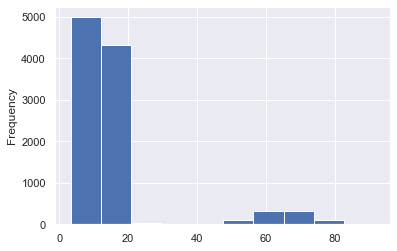

In [43]:
## check distribution of multiple goalkeeper statistics to find out bounds for what would be considered a goalkeeper
df_ratings['gk_positioning'].plot(kind='hist')

In [44]:
## safe to assume anyone with gk_reflexes over 40 is a goalkeeper
df_gk = df_ratings[df_ratings['gk_reflexes'] >= 40]
df_gk.head()

,id_x,player_api_id,player_fifa_api_id_x,height,weight,id_y,player_fifa_api_id_y,overall_rating,potential,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_name,,,,,,,,,,,,,,,,,,,,,
Aaron Lennox,9.0,528212.0,206592.0,190.50,181.0,176.0,206592.0,48.000000,56.857143,12.000000,...,15.000000,41.000000,15.000000,15.000000,12.000000,53.000000,41.000000,39.000000,51.000000,53.000000
Abdoulaye Diallo,43.0,189181.0,197233.0,187.96,174.0,705.0,197233.0,65.263158,75.052632,17.421053,...,27.684211,23.368421,21.368421,21.894737,18.315789,65.000000,61.789474,59.263158,61.368421,74.263158
Achille Coser,79.0,41489.0,163901.0,185.42,174.0,1230.0,163901.0,59.476190,60.952381,24.142857,...,31.666667,21.714286,25.000000,25.476190,24.761905,57.952381,58.809524,54.666667,61.904762,62.285714
Adam Bogdan,91.0,157303.0,184585.0,193.04,198.0,1423.5,184585.0,66.875000,76.062500,17.625000,...,23.375000,21.125000,17.625000,15.687500,17.000000,70.187500,63.687500,60.500000,66.125000,70.812500
Adam Collin,95.0,180197.0,53363.0,190.50,172.0,1481.0,53363.0,62.212121,63.424242,23.757576,...,32.181818,23.909091,22.454545,22.000000,24.121212,66.121212,60.818182,59.757576,59.030303,64.000000


In [45]:
## at the same time create updated outfield player df for anyone not a goalkeeper
df_ratings = df_ratings[df_ratings['gk_reflexes'] < 40]
df_ratings.head()

,id_x,player_api_id,player_fifa_api_id_x,height,weight,id_y,player_fifa_api_id_y,overall_rating,potential,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_name,,,,,,,,,,,,,,,,,,,,,
Aaron Appindangoye,1.0,505942.0,218353.0,182.88,187.0,3.0,218353.0,63.600000,67.600000,48.600000,...,53.600000,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000
Aaron Cresswell,2.0,155782.0,189615.0,170.18,146.0,22.0,189615.0,66.969697,74.484848,70.787879,...,57.454545,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091
Aaron Doran,3.0,162549.0,186170.0,170.18,163.0,51.5,186170.0,67.000000,74.192308,68.115385,...,69.384615,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000
Aaron Galindo,4.0,30572.0,140161.0,182.88,198.0,76.0,140161.0,69.086957,70.782609,57.217391,...,53.782609,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913
Aaron Hughes,5.0,23780.0,17725.0,182.88,154.0,100.0,17725.0,73.240000,74.680000,45.080000,...,46.480000,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000


In [46]:
## check number of outfield players out of 10,226 players
df_ratings.shape

(9357, 42)

In [47]:
## check number of goalkeepers out of 10,226 players
df_gk.shape

(869, 42)

In [48]:
## create bins to categorize players with respect to rating
## for example players with ratings between 80 & 85 will now be collated in a representation
bins = [0,30,40,50,55,60,65,70,75,80,85,90,100]
labels = [1,2,3,4,5,6,7,8,9,10,11,12]
df_ratings['binned'] = pd.cut(df_ratings['overall_rating'], bins=bins, labels=labels)
df_ratings.head()

,id_x,player_api_id,player_fifa_api_id_x,height,weight,id_y,player_fifa_api_id_y,overall_rating,potential,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,binned
player_name,,,,,,,,,,,,,,,,,,,,,
Aaron Appindangoye,1.0,505942.0,218353.0,182.88,187.0,3.0,218353.0,63.600000,67.600000,48.600000,...,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000,6
Aaron Cresswell,2.0,155782.0,189615.0,170.18,146.0,22.0,189615.0,66.969697,74.484848,70.787879,...,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091,7
Aaron Doran,3.0,162549.0,186170.0,170.18,163.0,51.5,186170.0,67.000000,74.192308,68.115385,...,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000,7
Aaron Galindo,4.0,30572.0,140161.0,182.88,198.0,76.0,140161.0,69.086957,70.782609,57.217391,...,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913,7
Aaron Hughes,5.0,23780.0,17725.0,182.88,154.0,100.0,17725.0,73.240000,74.680000,45.080000,...,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000,8


In [49]:
## change datatype into float in order to carry out statistical analysis
df_ratings['binned'] = df_ratings['binned'].astype(float)

### Now I have a clear way to analyse the relationship between different variables and player rating.

> I can group by binned player ratings and compare their relationship to any player attribute variable.

Text(0.5, 1.0, 'Relationship between Vision & Player Rating')

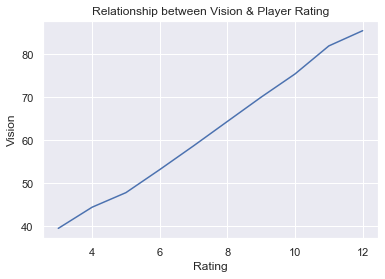

In [50]:
## example of analysing the relationship between a players rating and their vision
## clearly, on average, the better the player, the higher rated their 'vision' attribute is
df_ratings.groupby('binned')['vision'].mean().plot(kind='line')
plt.xlabel('Rating')
plt.ylabel('Vision')
plt.title('Relationship between Vision & Player Rating')

## Limitations

### Causality vs Correlation

> You have to be very careful when investigating the relationships between variables not to confuse correlation with causality. In the above example one may conclude that the better a player's vision, the higher rated they will be. 

> However often it is not that players with great vision are rated highly because of their vision, better players may just happen to have better vision. It is correlated with a high rating but not the cause of it.

In [51]:
## identify variables to test against overall rating
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, Aaron Appindangoye to dos Santos Fabio Junior
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_x                  9357 non-null   float64
 1   player_api_id         9357 non-null   float64
 2   player_fifa_api_id_x  9357 non-null   float64
 3   height                9357 non-null   float64
 4   weight                9357 non-null   float64
 5   id_y                  9357 non-null   float64
 6   player_fifa_api_id_y  9357 non-null   float64
 7   overall_rating        9357 non-null   float64
 8   potential             9357 non-null   float64
 9   crossing              9357 non-null   float64
 10  finishing             9357 non-null   float64
 11  heading_accuracy      9357 non-null   float64
 12  short_passing         9357 non-null   float64
 13  volleys               9357 non-null   float64
 14  dribbling             9357 non-null   flo

## Variables to Investigate

### 1. Sprint speed, strength, reactions, dribbling, long_passing with overall rating 

> To attempt to find a metric that has a strong positive correlation to rating

### 2. Sliding tackle, marking & aggression with overall rating 

> To attempt to find a metric that has a negative correlation to rating

Text(0.5, 1.0, 'Relationship between Sprint Speed & Rating')

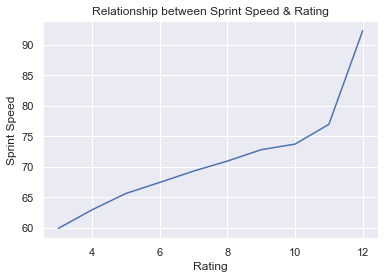

In [52]:
df_ratings.groupby('binned')['sprint_speed'].mean().plot(kind='line')
plt.xlabel('Rating')
plt.ylabel('Sprint Speed')
plt.title('Relationship between Sprint Speed & Rating')

Text(0.5, 1.0, 'Relationship between Strength & Rating')

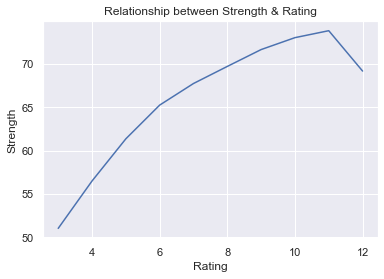

In [53]:
df_ratings.groupby('binned')['strength'].mean().plot(kind='line')
plt.xlabel('Rating')
plt.ylabel('Strength')
plt.title('Relationship between Strength & Rating')

Text(0.5, 1.0, 'Relationship between Dribbling & Rating')

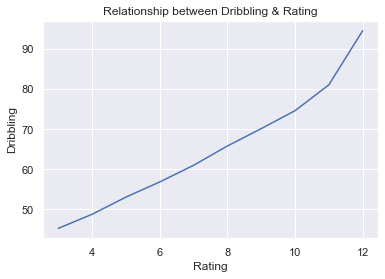

In [54]:
df_ratings.groupby('binned')['dribbling'].mean().plot(kind='line')
plt.xlabel('Rating')
plt.ylabel('Dribbling')
plt.title('Relationship between Dribbling & Rating')

Text(0.5, 1.0, 'Relationship between Long Passing & Rating')

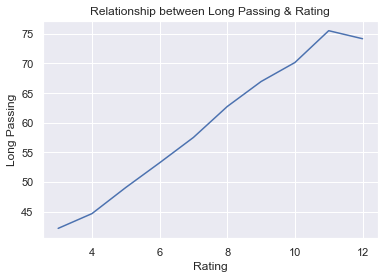

In [55]:
df_ratings.groupby('binned')['long_passing'].mean().plot(kind='line')
plt.xlabel('Rating')
plt.ylabel('Long Passing')
plt.title('Relationship between Long Passing & Rating')

<a id='conclusions'></a>
## Conclusions From Positively Correlated Statistics

### 1. Higher sprint speed, strength, long passing and dribbling all correlate with a higher rating

> This is expected as these are typically some of the most sought after attributes for a soccer player

### 2. Differences in Marginal Benefit

> For dribbling & sprint speed, the relationship is one of increasing marginal benefit for each unit increase. For example, an increase in sprint speed from 85 to 90 gives a player more of a ratings boost than an increase from 45 to 50. It is a non-linear relationship. 

> However for both long passing and strength, there is no positive correlation past a certain point, ratings over 85. This indicates there is an upper bound of long passing ability and strength and once that level it reached, further improvements have a negligible effect on a player's rating.

Text(0.5, 1.0, 'Relationship between Slide Tackling & Rating')

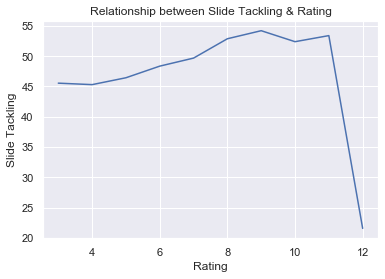

In [56]:
df_ratings.groupby('binned')['sliding_tackle'].mean().plot(kind='line')
plt.xlabel('Rating')
plt.ylabel('Slide Tackling')
plt.title('Relationship between Slide Tackling & Rating')

Text(0.5, 1.0, 'Relationship between Marking & Rating')

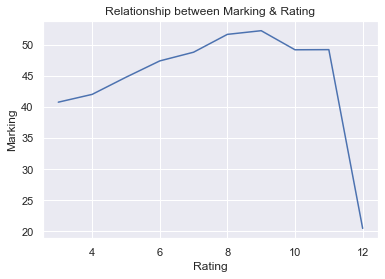

In [57]:
df_ratings.groupby('binned')['marking'].mean().plot(kind='line')
plt.xlabel('Rating')
plt.ylabel('Marking')
plt.title('Relationship between Marking & Rating')

Text(0.5, 1.0, 'Relationship between Aggression & Rating')

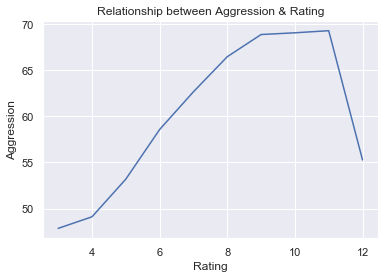

In [58]:
df_ratings.groupby('binned')['aggression'].mean().plot(kind='line')
plt.xlabel('Rating')
plt.ylabel('Aggression')
plt.title('Relationship between Aggression & Rating')

## Conclusions From Negatively Correlated Statistics

### 1. Higher slide tackling, aggression & marking do not necessarily correlate with a higher rating

> This is not expected as on average the best players will be better in almost every statistic.

### 2. They all correlate positively until a player is rated ~ 80

> Slide tackling, aggression & marking do increase with a player's rating up until the 80 mark. Similar to the positively correlated metrics earlier but even more so, as any marginal increase in a player's rating after this point sees a huge decline in these statistics. 

### 3. Possible explanation for this effect - causality vs correlation

> This is a sitation in which the data can be misleading. I would not conclude from the data that in order to be a great player, i.e 90 rated and above, that you should become less aggressive, sloppy with your marking and stop practising slide tackles.

> This effect is likely caused by the fact that the very best players do not have to slide tackle, as it risks injury managers may be happy for their best players not to engage in slide tackles.

> For aggression it may similarly be a case of the great players not needing to be aggressive because they do not have to be. They may be more skilled and not need to act as aggressive as players with less ability. This is also related to the above slide tackle situation. 

> Lastly, for marking, the highest rated players are biased in that the majority are attacking players, strikers or wingers that score a lot of goals and get a lot of attention. Marking is an attribute that measures how well a player can stop his opposition player on defence. However for these great & overwhelming attacking players, they may not need to bother marking since they are not as invoved in defence, or their managers are fine with them not expending energy defending which could be used in their strength, offense.

## Research Question 3: Is there such thing as home field advantage and if so, how much of an impact does it have?

### Interested in the differences in match results for home vs away teams

In [118]:
## find # of matches in match dataset
df_m.shape

(25979, 17)

In [119]:
df_m.head()

,id_x,country_id,League,Country,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Score,Outcome,Goals
0,1,1,Belgium Jupiler League,Belgium,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,0,Draw,2
1,1,1,Belgium Jupiler League,Belgium,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0,Draw,0
2,1,1,Belgium Jupiler League,Belgium,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,-3,Loss,3
3,1,1,Belgium Jupiler League,Belgium,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,5,Win,5
4,1,1,Belgium Jupiler League,Belgium,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,-2,Loss,4


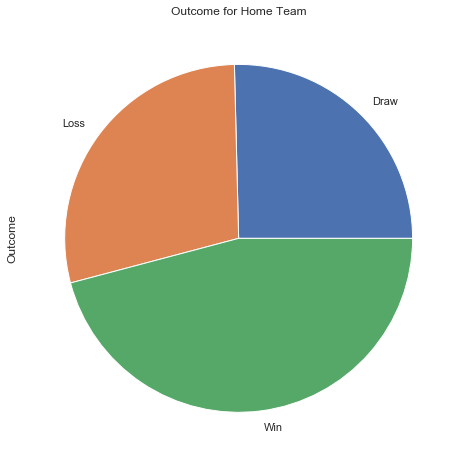

In [120]:
## visualize home teams' outcomes in a pie chart
df_m['Outcome'].value_counts(ascending=True).plot(kind='pie', title = 'Outcome for Home Team', figsize = (8,8))

In [158]:
df_bycountry = df_m.groupby(['Country','Outcome'])['id_x'].count()
df_bycountry

Country      Outcome
Belgium      Draw        425
             Loss        493
             Win         810
England      Draw        783
             Loss        867
             Win        1390
France       Draw        859
             Loss        822
             Win        1359
Germany      Draw        597
             Loss        744
             Win        1107
Italy        Draw        796
             Loss        814
             Win        1407
Netherlands  Draw        581
             Loss        696
             Win        1171
Poland       Draw        525
             Loss        525
             Win         870
Portugal     Draw        533
             Loss        611
             Win         908
Scotland     Draw        447
             Loss        617
             Win         760
Spain        Draw        704
             Loss        851
             Win        1485
Switzerland  Draw        346
             Loss        426
             Win         650
Name: id_x, dtype: int

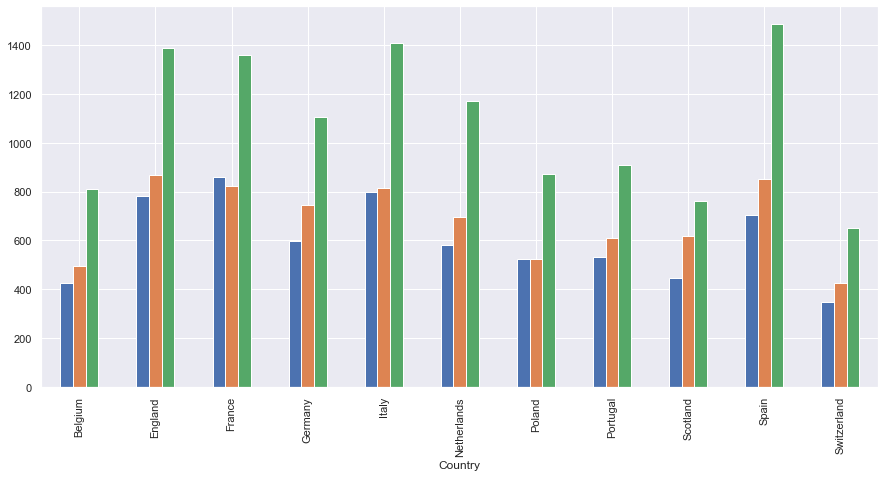

In [155]:
df_bycountry.unstack().plot(kind='bar',legend =False,figsize=(15,7))

In [1154]:
## the home team wins 45.8% of all matches
11917/25979

0.45871665576042187

In [1155]:
## the away team only wins 28.7% of all matches
7466/25979

0.28738596558759

In [1156]:
## it is a draw 25.3% of all matches
6596/25979

0.25389737865198814

### The home team wins on average 46% of all matches against 29% for the away team

> This shows a clear advantage for the home team. With over 25,000 matches in the dataset this is a clear causal link.

> Reasons for this effect may vary but in general the home team has a massive advantage over the away team.

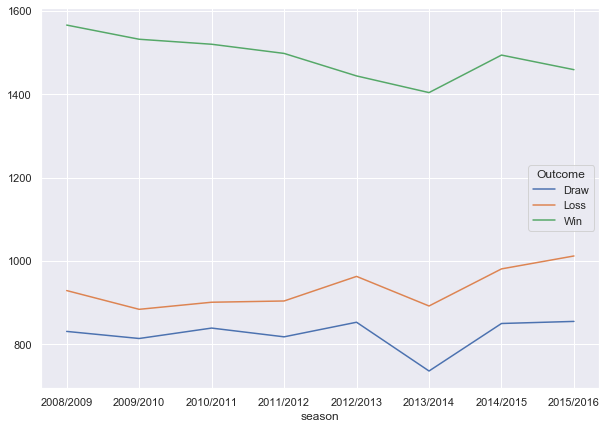

In [68]:
## visualization of the trend in outcomes over the time period given
fig, ax = plt.subplots(figsize=(10,7))
df_m.groupby('season')['Outcome'].value_counts(ascending=True).unstack().plot(ax=ax)

### The long-term trend is that the home team's advantage is slowly being diminished